In [5]:

#spamPath = system.file(package = "RSpamData")
#spamPath = "/Users/nolan/RPackages/RSpamData"spamPath = "."
spamPath = "./spam"
list.dirs(spamPath, full.names = FALSE)



[1] ""                    "messages"            "messages/easy_ham"  
[4] "messages/easy_ham_2" "messages/hard_ham"   "messages/spam"      
[7] "messages/spam_2"

In [6]:
list.files(path = paste(spamPath, "messages", 
                        sep = .Platform$file.sep))



[1] "easy_ham"   "easy_ham_2" "hard_ham"   "spam"       "spam_2"

In [7]:
list.files(path = paste(spamPath,'spam', sep=.Platform$file.sep))

character(0)

In [8]:
head(list.files(path = paste(spamPath, "messages", "spam_2",
                             sep = .Platform$file.sep)))

dirNames = list.files(path = paste(spamPath, "messages", 
                      sep = .Platform$file.sep))
length(list.files(paste(spamPath, "messages", dirNames, 
                        sep = .Platform$file.sep)))

sapply(paste(spamPath, "messages", dirNames, 
             sep = .Platform$file.sep), 
       function(dir) length(list.files(dir)) )

fullDirNames = paste(spamPath, "messages", dirNames, 
                     sep = .Platform$file.sep)

[1] "00001.317e78fa8ee2f54cd4890fdc09ba8176"
[2] "00002.9438920e9a55591b18e60d1ed37d992b"
[3] "00003.590eff932f8704d8b0fcbe69d023b54d"
[4] "00004.bdcc075fa4beb5157b5dd6cd41d8887b"
[5] "00005.ed0aba4d386c5e62bc737cf3f0ed9589"
[6] "00006.3ca1f399ccda5d897fecb8c57669a283"

[1] 9353

./spam/messages/easy_ham ./spam/messages/easy_ham_2 
                      5052                       1401 
  ./spam/messages/hard_ham       ./spam/messages/spam 
                       501                       1001 
    ./spam/messages/spam_2 
                      1398

In [9]:
fileNames = list.files(fullDirNames[1], full.names = TRUE)
fileNames[1]

msg = readLines(fileNames[1])
head(msg)

indx = c(1:5, 15, 27, 68, 69, 329, 404, 427, 516, 852, 971)
fn = list.files(fullDirNames[1], full.names = TRUE)[indx]
sampleEmail = sapply(fn, readLines)        

msg = sampleEmail[[1]]
which(msg == "")[1]

match("", msg)

splitPoint = match("", msg)

msg[ (splitPoint - 2):(splitPoint + 6) ]

header = msg[1:(splitPoint-1)]
body = msg[ -(1:splitPoint) ]

splitMessage = function(msg) {
  splitPoint = match("", msg)
  header = msg[1:(splitPoint-1)]
  body = msg[ -(1:splitPoint) ]
  return(list(header = header, body = body))
}

sampleSplit = lapply(sampleEmail, splitMessage)

[1] "./spam/messages/easy_ham/00001.7c53336b37003a9286aba55d2945844c"

[1] "From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002"     
[2] "Return-Path: <exmh-workers-admin@spamassassin.taint.org>"         
[3] "Delivered-To: zzzz@localhost.netnoteinc.com"                      
[4] "Received: from localhost (localhost [127.0.0.1])"                 
[5] "\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36"
[6] "\tfor <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)"

[1] 63

[1] 63

[1] "List-Archive: <https://listman.spamassassin.taint.org/mailman/private/exmh-workers/>"
[2] "Date: Thu, 22 Aug 2002 18:26:25 +0700"                                               
[3] ""                                                                                    
[4] "    Date:        Wed, 21 Aug 2002 10:54:46 -0500"                                    
[5] "    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>"         
[6] "    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>"                         
[7] ""                                                                                    
[8] ""                                                                                    
[9] "  | I can't reproduce this error."

In [10]:
header = sampleSplit[[1]]$header
grep("Content-Type", header)

grep("multi", tolower(header[46]))

header[46]

headerList = lapply(sampleSplit, function(msg) msg$header)
CTloc = sapply(headerList, grep, pattern = "Content-Type")
CTloc

sapply(headerList, function(header) {
                       CTloc = grep("Content-Type", header)
                       if (length(CTloc) == 0) return(NA)
                       CTloc
                   })

hasAttach = sapply(headerList, function(header) {
  CTloc = grep("Content-Type", header)
  if (length(CTloc) == 0) return(FALSE)
  grepl("multi", tolower(header[CTloc])) 
})

hasAttach

header = sampleSplit[[6]]$header
boundaryIdx = grep("boundary=", header)
header[boundaryIdx]

sub(".*boundary=\"(.*)\";.*", "\\1", header[boundaryIdx])

header2 = headerList[[9]]
boundaryIdx2 = grep("boundary=", header2)
header2[boundaryIdx2]

[1] 46

integer(0)

[1] "Content-Type: text/plain; charset=us-ascii"

$`./spam/messages/easy_ham/00001.7c53336b37003a9286aba55d2945844c`
[1] 46

$`./spam/messages/easy_ham/00002.9c4069e25e1ef370c078db7ee85ff9ac`
[1] 45

$`./spam/messages/easy_ham/00003.860e3c3cee1b42ead714c5c874fe25f7`
[1] 42

$`./spam/messages/easy_ham/00004.864220c5b6930b209cc287c361c99af1`
[1] 30

$`./spam/messages/easy_ham/00005.bf27cdeaf0b8c4647ecd61b1d09da613`
[1] 44

$`./spam/messages/easy_ham/00014.cb20e10b2bfcb8210a1c310798532a57`
[1] 54

$`./spam/messages/easy_ham/00025.d685245bdc4444f44fa091e6620b20b3`
integer(0)

$`./spam/messages/easy_ham/00062.009f5a1a8fa88f0b38299ad01562bb37`
[1] 21

$`./spam/messages/easy_ham/00063.0acbc484a73f0e0b727e06c100d8df7b`
[1] 17

$`./spam/messages/easy_ham/0030.77828e31de08ebb58b583688b87524cc`
[1] 52

$`./spam/messages/easy_ham/00368.f86324a03e7ae7070cc40f302385f5d3`
[1] 31

$`./spam/messages/easy_ham/00389.8606961eaeef7b921ce1c53773248d69`
[1] 52

$`./spam/messages/easy_ham/0047.5c3e049737a2813d4ac6f13f02362fb1`
[1] 52

$`./spam/messages/easy_ham/00775.0e012f373467846510d9db297e99a008`
[1] 27

$`./spam/messages/easy_ham/00883.c44a035e7589e83076b7f1fed8fa97d5`
[1] 31

./spam/messages/easy_ham/00001.7c53336b37003a9286aba55d2945844c 
                                                             46 
./spam/messages/easy_ham/00002.9c4069e25e1ef370c078db7ee85ff9ac 
                                                             45 
./spam/messages/easy_ham/00003.860e3c3cee1b42ead714c5c874fe25f7 
                                                             42 
./spam/messages/easy_ham/00004.864220c5b6930b209cc287c361c99af1 
                                                             30 
./spam/messages/easy_ham/00005.bf27cdeaf0b8c4647ecd61b1d09da613 
                                                             44 
./spam/messages/easy_ham/00014.cb20e10b2bfcb8210a1c310798532a57 
                                                             54 
./spam/messages/easy_ham/00025.d685245bdc4444f44fa091e6620b20b3 
                                                             NA 
./spam/messages/easy_ham/00062.009f5a1a8fa88f0b38299ad01562bb37 
                                                             21 
./spam/messages/easy_ham/00063.0acbc484a73f0e0b727e06c100d8df7b 
                                                             17 
 ./spam/messages/easy_ham/0030.77828e31de08ebb58b583688b87524cc 
                                                             52 
./spam/messages/easy_ham/00368.f86324a03e7ae7070cc40f302385f5d3 
                                                             31 
./spam/messages/easy_ham/00389.8606961eaeef7b921ce1c53773248d69 
                                                             52 
 ./spam/messages/easy_ham/0047.5c3e049737a2813d4ac6f13f02362fb1 
                                                             52 
./spam/messages/easy_ham/00775.0e012f373467846510d9db297e99a008 
                                                             27 
./spam/messages/easy_ham/00883.c44a035e7589e83076b7f1fed8fa97d5 
                                                             31

./spam/messages/easy_ham/00001.7c53336b37003a9286aba55d2945844c 
                                                          FALSE 
./spam/messages/easy_ham/00002.9c4069e25e1ef370c078db7ee85ff9ac 
                                                          FALSE 
./spam/messages/easy_ham/00003.860e3c3cee1b42ead714c5c874fe25f7 
                                                          FALSE 
./spam/messages/easy_ham/00004.864220c5b6930b209cc287c361c99af1 
                                                          FALSE 
./spam/messages/easy_ham/00005.bf27cdeaf0b8c4647ecd61b1d09da613 
                                                          FALSE 
./spam/messages/easy_ham/00014.cb20e10b2bfcb8210a1c310798532a57 
                                                           TRUE 
./spam/messages/easy_ham/00025.d685245bdc4444f44fa091e6620b20b3 
                                                          FALSE 
./spam/messages/easy_ham/00062.009f5a1a8fa88f0b38299ad01562bb37 
                                                           TRUE 
./spam/messages/easy_ham/00063.0acbc484a73f0e0b727e06c100d8df7b 
                                                           TRUE 
 ./spam/messages/easy_ham/0030.77828e31de08ebb58b583688b87524cc 
                                                           TRUE 
./spam/messages/easy_ham/00368.f86324a03e7ae7070cc40f302385f5d3 
                                                           TRUE 
./spam/messages/easy_ham/00389.8606961eaeef7b921ce1c53773248d69 
                                                           TRUE 
 ./spam/messages/easy_ham/0047.5c3e049737a2813d4ac6f13f02362fb1 
                                                           TRUE 
./spam/messages/easy_ham/00775.0e012f373467846510d9db297e99a008 
                                                           TRUE 
./spam/messages/easy_ham/00883.c44a035e7589e83076b7f1fed8fa97d5 
                                                           TRUE

[1] "    boundary=\"==_Exmh_-1317289252P\";"

[1] "==_Exmh_-1317289252P"

[1] "Content-Type: multipart/alternative; boundary=Apple-Mail-2-874629474"

In [11]:
sub('.*boundary="(.*)";.*', "\\1", header2[boundaryIdx2])

boundary2 = gsub('"', "", header2[boundaryIdx2])

sub(".*boundary= *(.*);?.*", "\\1", boundary2)

boundary = gsub('"', "", header[boundaryIdx])
sub(".*boundary= *(.*);?.*", "\\1", boundary)

sub(".*boundary= *([^;]*);?.*", "\\1", boundary)

getBoundary = function(header) {
  boundaryIdx = grep("boundary=", header)
  boundary = gsub('"', "", header[boundaryIdx])
  gsub(".*boundary= *([^;]*);?.*", "\\1", boundary)
}

sampleSplit[[6]]$body

boundary = getBoundary(headerList[[15]]) 
body = sampleSplit[[15]]$body

bString = paste("--", boundary, sep = "")
bStringLocs = which(bString == body)
bStringLocs

eString = paste("--", boundary, "--", sep = "")
eStringLoc = which(eString == body)
eStringLoc

msg = body[ (bStringLocs[1] + 1) : (bStringLocs[2] - 1)]
tail(msg)

msg = c(msg, body[ (eStringLoc + 1) : length(body) ])
tail(msg)

[1] "Content-Type: multipart/alternative; boundary=Apple-Mail-2-874629474"

[1] "Apple-Mail-2-874629474"

[1] "==_Exmh_-1317289252P;"

[1] "==_Exmh_-1317289252P"

[1] "--==_Exmh_-1317289252P"                                                           
 [2] "Content-Type: text/plain; charset=us-ascii"                                       
 [3] ""                                                                                 
 [4] "> From:  Chris Garrigues <cwg-exmh@DeepEddy.Com>"                                 
 [5] "> Date:  Wed, 21 Aug 2002 10:40:39 -0500"                                         
 [6] ">"                                                                                
 [7] "> > From:  Chris Garrigues <cwg-exmh@DeepEddy.Com>"                               
 [8] "> > Date:  Wed, 21 Aug 2002 10:17:45 -0500"                                       
 [9] "> >"                                                                              
[10] "> > Ouch...I'll get right on it."                                                 
[11] "> > "                                                                             
[12] "> > > From:  Robert Elz <kre@munnari.OZ.AU>"                                      
[13] "> > > Date:  Wed, 21 Aug 2002 19:30:01 +0700"                                     
[14] "> > >"                                                                            
[15] "> > > Any chance of having that lengthen instead?   I like all my exmh stuff"     
[16] "> > > in nice columns (fits the display better).   That is, I use the detache"    
[17] "> d"                                                                              
[18] "> > > folder list, one column.   The main exmh window takes up full screen,"      
[19] "> > > top to bottom, but less than half the width, etc..."                        
[20] "> "                                                                               
[21] "> I thought about that.  The first order approximation would be to just add "     
[22] "> using pack .... -side top instead of pack ... -side left, however, since their "
[23] "> each a different width, it would look funny."                                   
[24] ""                                                                                 
[25] "I've done this.  It's not as pretty as I think it should be, but it works.  "     
[26] "I'm going to leave the cosmetic issues to others.  When I update the "            
[27] "documentation, I'll add this to the exmh.TODO file."                              
[28] ""                                                                                 
[29] "I'm leaving for a 2 1/2 week vacation in a week, so this is the last new "        
[30] "functionality I'm going to add for a while.  Also, I now have pretty much "       
[31] "everything in there that I want for my own use, so I'm probably pretty much "     
[32] "done.  I'll work on bug fixes and documentation before my vacation, and "         
[33] "hopefully do nothing more afterwards."                                            
[34] ""                                                                                 
[35] "Chris"                                                                            
[36] ""                                                                                 
[37] "-- "                                                                              
[38] "Chris Garrigues                 http://www.DeepEddy.Com/~cwg/"                    
[39] "virCIO                          http://www.virCIO.Com"                            
[40] "716 Congress, Suite 200"                                                          
[41] "Austin, TX  78701\t\t+1 512 374 0500"                                               
[42] ""                                                                                 
[43] "  World War III:  The Wrong-Doers Vs. the Evil-Doers."                            
[44] ""                                                                                 
[45] ""                                                                            

[1]  2 35

[1] 77

[1] ">"     ">Yuck" ">  "   ">"     ""      ""

[1] ">  " ">"   ""    ""    ""    ""

In [12]:
dropAttach = function(body, boundary){
  
  bString = paste("--", boundary, sep = "")
  bStringLocs = which(bString == body)
  
  if (length(bStringLocs) <= 1) return(body)
  
  eString = paste("--", boundary, "--", sep = "")
  eStringLoc = which(eString == body)
  if (length(eStringLoc) == 0) 
    return(body[ (bStringLocs[1] + 1) : (bStringLocs[2] - 1)])
  
  n = length(body)
  if (eStringLoc < n) 
     return( body[ c( (bStringLocs[1] + 1) : (bStringLocs[2] - 1), 
                    ( (eStringLoc + 1) : n )) ] )
  
  return( body[ (bStringLocs[1] + 1) : (bStringLocs[2] - 1) ])
}

head(sampleSplit[[1]]$body)

msg = sampleSplit[[3]]$body
head(msg)

msg[ c(1, 3, 26, 27) ]

cleanMsg = tolower(gsub("[[:punct:]0-9[:blank:]]+", " ", msg))
cleanMsg[ c(1, 3, 26, 27) ]

library(tm)
stopWords = stopwords()
cleanSW = tolower(gsub("[[:punct:]0-9[:blank:]]+", " ", stopWords))
SWords = unlist(strsplit(cleanSW, "[[:blank:]]+"))
SWords = SWords[ nchar(SWords) > 1 ]
stopWords = unique(SWords)

[1] "    Date:        Wed, 21 Aug 2002 10:54:46 -0500"                           
[2] "    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>"
[3] "    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>"                
[4] ""                                                                           
[5] ""                                                                           
[6] "  | I can't reproduce this error."

[1] "Man Threatens Explosion In Moscow "                                        
[2] ""                                                                          
[3] "Thursday August 22, 2002 1:40 PM"                                          
[4] "MOSCOW (AP) - Security officers on Thursday seized an unidentified man who"
[5] "said he was armed with explosives and threatened to blow up his truck in"  
[6] "front of Russia's Federal Security Services headquarters in Moscow, NTV"

[1] "Man Threatens Explosion In Moscow "                      
[2] "Thursday August 22, 2002 1:40 PM"                        
[3] "4 DVDs Free +s&p Join Now"                               
[4] "http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM"

[1] "man threatens explosion in moscow "                   
[2] "thursday august pm"                                   
[3] " dvds free s p join now"                              
[4] "http us click yahoo com pt ybb nxieaa mg haa gsolb tm"

Loading required package: NLP


In [13]:
words = unlist(strsplit(cleanMsg, "[[:blank:]]+"))

words = words[ nchar(words) > 1 ]

words = words[ !( words %in% stopWords) ]
head(words)

cleanText =
function(msg)   {
  tolower(gsub("[[:punct:]0-9[:space:][:blank:]]+", " ", msg))
}

findMsgWords = 
function(msg, stopWords) {
 if(is.null(msg))
  return(character())

 words = unique(unlist(strsplit(cleanText(msg), "[[:blank:]\t]+")))
 
 # drop empty and 1 letter words
 words = words[ nchar(words) > 1]
 words = words[ !( words %in% stopWords) ]
 invisible(words)
}

[1] "man"       "threatens" "explosion" "moscow"    "thursday"  "august"

In [14]:
processAllWords = function(dirName, stopWords)
{
       # read all files in the directory
  fileNames = list.files(dirName, full.names = TRUE)
       # drop files that are not email, i.e., cmds
  notEmail = grep("cmds$", fileNames)
  if ( length(notEmail) > 0) fileNames = fileNames[ - notEmail ]

  messages = lapply(fileNames, readLines, encoding = "latin1")
  
       # split header and body
  emailSplit = lapply(messages, splitMessage)
       # put body and header in own lists
  bodyList = lapply(emailSplit, function(msg) msg$body)
  headerList = lapply(emailSplit, function(msg) msg$header)
  rm(emailSplit)
  
       # determine which messages have attachments
  hasAttach = sapply(headerList, function(header) {
    CTloc = grep("Content-Type", header)
    if (length(CTloc) == 0) return(0)
    multi = grep("multi", tolower(header[CTloc])) 
    if (length(multi) == 0) return(0)
    multi
  })
  
  hasAttach = which(hasAttach > 0)
  
       # find boundary strings for messages with attachments
  boundaries = sapply(headerList[hasAttach], getBoundary)
  
       # drop attachments from message body
  bodyList[hasAttach] = mapply(dropAttach, bodyList[hasAttach], 
                               boundaries, SIMPLIFY = FALSE)
  
       # extract words from body
  msgWordsList = lapply(bodyList, findMsgWords, stopWords)
  
  invisible(msgWordsList)
}



In [15]:
msgWordsList = lapply(fullDirNames, processAllWords, 
                      stopWords = stopWords) 



Warning message in FUN(X[[i]], ...):
"incomplete final line found on './spam/messages/hard_ham/00228.0eaef7857bbbf3ebf5edbbdae2b30493'"Warning message in FUN(X[[i]], ...):
"incomplete final line found on './spam/messages/hard_ham/0231.7c6cc716ce3f3bfad7130dd3c8d7b072'"Warning message in FUN(X[[i]], ...):
"incomplete final line found on './spam/messages/hard_ham/0250.7c6cc716ce3f3bfad7130dd3c8d7b072'"Warning message in FUN(X[[i]], ...):
"incomplete final line found on './spam/messages/spam/00136.faa39d8e816c70f23b4bb8758d8a74f0'"Warning message in FUN(X[[i]], ...):
"incomplete final line found on './spam/messages/spam/0143.260a940290dcb61f9327b224a368d4af'"

In [16]:
numMsgs = sapply(msgWordsList, length)
numMsgs

[1] 5051 1400  500 1000 1397

In [17]:
isSpam = rep(c(FALSE, FALSE, FALSE, TRUE, TRUE), numMsgs)

msgWordsList = unlist(msgWordsList, recursive = FALSE)

numEmail = length(isSpam)
numSpam = sum(isSpam)
numHam = numEmail - numSpam

set.seed(418910)

testSpamIdx = sample(numSpam, size = floor(numSpam/3))
testHamIdx = sample(numHam, size = floor(numHam/3))

testMsgWords = c((msgWordsList[isSpam])[testSpamIdx],
                 (msgWordsList[!isSpam])[testHamIdx] )
trainMsgWords = c((msgWordsList[isSpam])[ - testSpamIdx], 
                  (msgWordsList[!isSpam])[ - testHamIdx])

testIsSpam = rep(c(TRUE, FALSE), 
                 c(length(testSpamIdx), length(testHamIdx)))
trainIsSpam = rep(c(TRUE, FALSE), 
                 c(numSpam - length(testSpamIdx), 
                   numHam - length(testHamIdx)))

bow = unique(unlist(trainMsgWords))

length(bow)

spamWordCounts = rep(0, length(bow))

names(spamWordCounts) = bow

tmp = lapply(trainMsgWords[trainIsSpam], unique)
tt = table( unlist(tmp) )
spamWordCounts[ names(tt) ] = tt

[1] 80059

In [18]:
computeFreqs =
function(wordsList, spam, bow = unique(unlist(wordsList)))
{
   # create a matrix for spam, ham, and log odds
  wordTable = matrix(0.5, nrow = 4, ncol = length(bow), 
                     dimnames = list(c("spam", "ham", 
                                        "presentLogOdds", 
                                        "absentLogOdds"),  bow))

   # For each spam message, add 1 to counts for words in message
  counts.spam = table(unlist(lapply(wordsList[spam], unique)))
  wordTable["spam", names(counts.spam)] = counts.spam + .5

   # Similarly for ham messages
  counts.ham = table(unlist(lapply(wordsList[!spam], unique)))  
  wordTable["ham", names(counts.ham)] = counts.ham + .5  


   # Find the total number of spam and ham
  numSpam = sum(spam)
  numHam = length(spam) - numSpam

   # Prob(word|spam) and Prob(word | ham)
  wordTable["spam", ] = wordTable["spam", ]/(numSpam + .5)
  wordTable["ham", ] = wordTable["ham", ]/(numHam + .5)
  
   # log odds
  wordTable["presentLogOdds", ] = 
     log(wordTable["spam",]) - log(wordTable["ham", ])
  wordTable["absentLogOdds", ] = 
     log((1 - wordTable["spam", ])) - log((1 -wordTable["ham", ]))

  invisible(wordTable)
}

In [19]:
trainTable = computeFreqs(trainMsgWords, trainIsSpam)

newMsg = testMsgWords[[1]]

newMsg = newMsg[!is.na(match(newMsg, colnames(trainTable)))]

present = colnames(trainTable) %in% newMsg

sum(trainTable["presentLogOdds", present]) + 
  sum(trainTable["absentLogOdds", !present])

newMsg = testMsgWords[[ which(!testIsSpam)[1] ]]
newMsg = newMsg[!is.na(match(newMsg, colnames(trainTable)))]
present = (colnames(trainTable) %in% newMsg)
sum(trainTable["presentLogOdds", present]) + 
     sum(trainTable["absentLogOdds", !present])

computeMsgLLR = function(words, freqTable) 
{
       # Discards words not in training data.
  words = words[!is.na(match(words, colnames(freqTable)))]

       # Find which words are present
  present = colnames(freqTable) %in% words

  sum(freqTable["presentLogOdds", present]) +
    sum(freqTable["absentLogOdds", !present])
}

testLLR = sapply(testMsgWords, computeMsgLLR, trainTable)

tapply(testLLR, testIsSpam, summary)


[1] 255.0476

[1] -124.3275

$`FALSE`
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1361.89  -127.06  -101.18  -116.25   -81.26   700.23 

$`TRUE`
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  -60.574     6.369    49.837   137.546   131.719 23518.028 


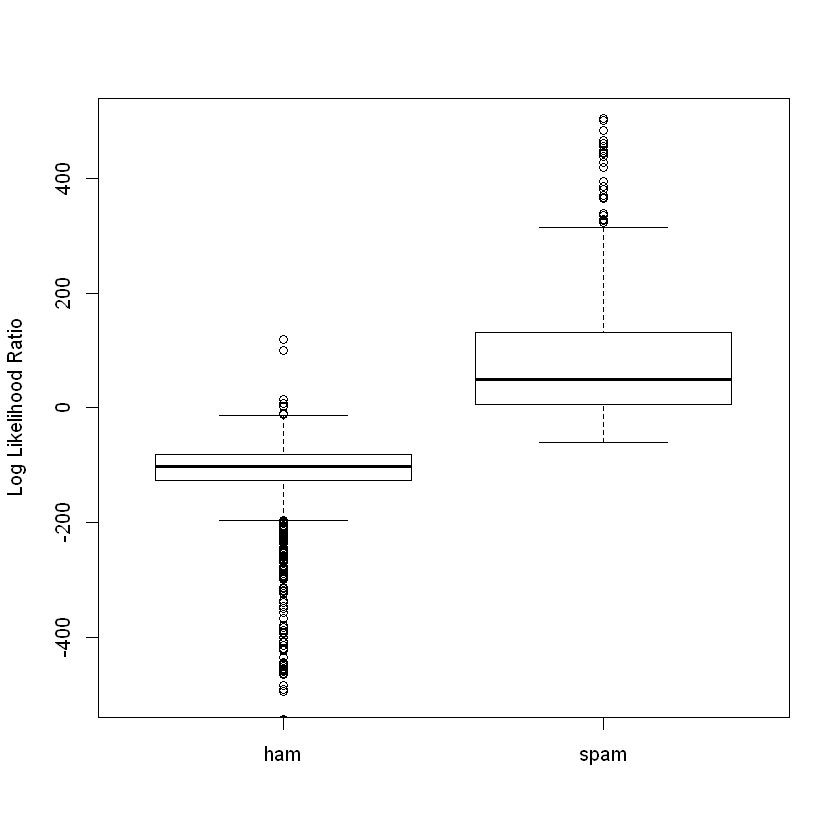

In [20]:
#pdf("SP_Boxplot.pdf", width = 6, height = 6)
spamLab = c("ham", "spam")[1 + testIsSpam]
boxplot(testLLR ~ spamLab, ylab = "Log Likelihood Ratio",
      #  main = "Log Likelihood Ratio for Randomly Chosen Test Messages",
        ylim=c(-500, 500))
#dev.off()


In [21]:
typeIErrorRate = 
function(tau, llrVals, spam)
{
  classify = llrVals > tau
  sum(classify & !spam)/sum(!spam)
}

typeIErrorRate(0, testLLR,testIsSpam)

typeIErrorRate(-20, testLLR,testIsSpam)

typeIErrorRates = 
function(llrVals, isSpam) 
{
  o = order(llrVals)
  llrVals =  llrVals[o]
  isSpam = isSpam[o]

  idx = which(!isSpam)
  N = length(idx)
  list(error = (N:1)/N, values = llrVals[idx])
}

[1] 0.003452741

[1] 0.005610703

In [22]:
typeIIErrorRates = function(llrVals, isSpam) {
    
  o = order(llrVals)
  llrVals =  llrVals[o]
  isSpam = isSpam[o]
    
    
  idx = which(isSpam)
  N = length(idx)
  list(error = (1:(N))/N, values = llrVals[idx])
  }  

xI = typeIErrorRates(testLLR, testIsSpam)
xII = typeIIErrorRates(testLLR, testIsSpam)
tau01 = round(min(xI$values[xI$error <= 0.01]))
t2 = max(xII$error[ xII$values < tau01 ])

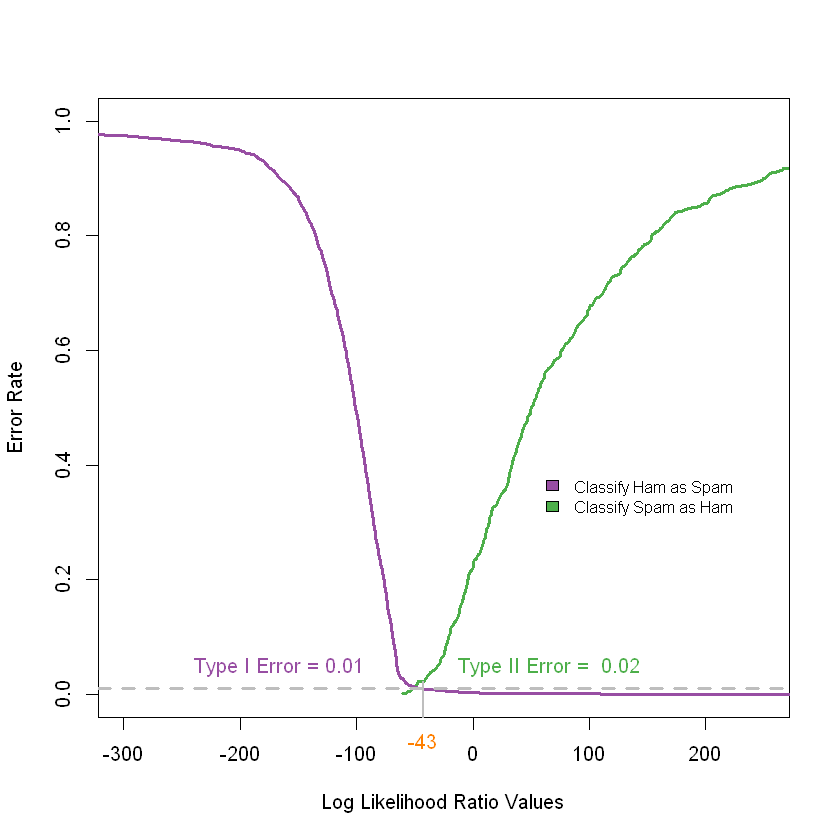

In [23]:
#pdf("LinePlotTypeI+IIErrors.pdf", width = 8, height = 6)

library(RColorBrewer)
cols = brewer.pal(9, "Set1")[c(3, 4, 5)]
plot(xII$error ~ xII$values,  type = "l", col = cols[1], lwd = 3,
     xlim = c(-300, 250), ylim = c(0, 1),
     xlab = "Log Likelihood Ratio Values", ylab="Error Rate")
points(xI$error ~ xI$values, type = "l", col = cols[2], lwd = 3)
legend(x = 50, y = 0.4, fill = c(cols[2], cols[1]),
       legend = c("Classify Ham as Spam", 
                  "Classify Spam as Ham"), cex = 0.8,
       bty = "n")
abline(h=0.01, col ="grey", lwd = 3, lty = 2)
text(-250, 0.05, pos = 4, "Type I Error = 0.01", col = cols[2])

mtext(tau01, side = 1, line = 0.5, at = tau01, col = cols[3])
segments(x0 = tau01, y0 = -.50, x1 = tau01, y1 = t2, 
         lwd = 2, col = "grey")
text(tau01 + 20, 0.05, pos = 4,
     paste("Type II Error = ", round(t2, digits = 2)), 
     col = cols[1])

#dev.off()

In [24]:
k = 5
numTrain = length(trainMsgWords)
partK = sample(numTrain)
tot = k * floor(numTrain/k)
partK = matrix(partK[1:tot], ncol = k)

testFoldOdds = NULL
for (i in 1:k) {
  foldIdx = partK[ , i]
  trainTabFold = computeFreqs(trainMsgWords[-foldIdx], trainIsSpam[-foldIdx])
  testFoldOdds = c(testFoldOdds, 
               sapply(trainMsgWords[ foldIdx ], computeMsgLLR, trainTabFold))
}

testFoldSpam = NULL
for (i in 1:k) {
  foldIdx = partK[ , i]
  testFoldSpam = c(testFoldSpam, trainIsSpam[foldIdx])
}

xFoldI = typeIErrorRates(testFoldOdds, testFoldSpam)
xFoldII = typeIIErrorRates(testFoldOdds, testFoldSpam)
tauFoldI = round(min(xFoldI$values[xFoldI$error <= 0.01]))
tFold2 = xFoldII$error[ xFoldII$values < tauFoldI ]

smallNums = rep((1/2)^40, 2000000)

In [25]:
largeNum = 10000

print(sum(smallNums), digits = 20)

print(largeNum + sum(smallNums), digits = 20)

for (i in 1:length(smallNums)) {
  largeNum = largeNum + smallNums[i]
}
print(largeNum, digits = 20)

sampleSplit = lapply(sampleEmail, splitMessage)

header = sampleSplit[[1]]$header
header[1:12]

header[1] = sub("^From", "Top-From:", header[1])
header[1]

[1] 1.8189894035458565e-06
[1] 10000.000001818989
[1] 10000


[1] "From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002"                                      
 [2] "Return-Path: <exmh-workers-admin@spamassassin.taint.org>"                                          
 [3] "Delivered-To: zzzz@localhost.netnoteinc.com"                                                       
 [4] "Received: from localhost (localhost [127.0.0.1])"                                                  
 [5] "\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36"                                 
 [6] "\tfor <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)"                                      
 [7] "Received: from phobos [127.0.0.1]"                                                                 
 [8] "\tby localhost with IMAP (fetchmail-5.9.0)"                                                         
 [9] "\tfor zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)"                          
[10] "Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by"
[11] "    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for"                            
[12] "    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100"

[1] "Top-From: exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002"

In [26]:
headerPieces = read.dcf(textConnection(header), all = TRUE)

headerPieces[, "Delivered-To"]


headerVec = unlist(headerPieces)
dupKeys = sapply(headerPieces, function(x) length(unlist(x)))
names(headerVec) = rep(colnames(headerPieces), dupKeys)

headerVec[ which(names(headerVec) == "Delivered-To") ]

length(headerVec)

length(unique(names(headerVec)))

processHeader = function(header)
{
       # modify the first line to create a key:value pair
  header[1] = sub("^From", "Top-From:", header[1])
  
  headerMat = read.dcf(textConnection(header), all = TRUE)
  headerVec = unlist(headerMat)
  
  dupKeys = sapply(headerMat, function(x) length(unlist(x)))
  names(headerVec) = rep(colnames(headerMat), dupKeys)
  
  return(headerVec)
}


[[1]]
[1] "zzzz@localhost.netnoteinc.com"              
[2] "exmh-workers@listman.spamassassin.taint.org"

Delivered-To 
              "zzzz@localhost.netnoteinc.com" 
                                 Delivered-To 
"exmh-workers@listman.spamassassin.taint.org"

[1] 36

[1] 26

In [27]:
headerList = lapply(sampleSplit, 
                    function(msg) {
                      processHeader(msg$header)} )

contentTypes = sapply(headerList, function(header) 
                                        header["Content-Type"])
names(contentTypes) = NULL
contentTypes

hasAttach = grep("^ *multi", tolower(contentTypes))
hasAttach

boundaries = getBoundary(contentTypes[ hasAttach ])
boundaries

boundary = boundaries[9]
body = sampleSplit[[15]]$body

bString = paste("--", boundary, sep = "")
bStringLocs = which(bString == body)
bStringLocs

eString = paste("--", boundary, "--", sep = "")
eStringLoc = which(eString == body)
eStringLoc

diff(c(bStringLocs[-1], eStringLoc))

[1] "text/plain; charset=us-ascii"                                                                                   
 [2] "text/plain; charset=US-ASCII"                                                                                   
 [3] "text/plain; charset=US-ASCII"                                                                                   
 [4] "text/plain; charset=\"us-ascii\""                                                                               
 [5] "text/plain; charset=US-ASCII"                                                                                   
 [6] "multipart/signed;\nboundary=\"==_Exmh_-1317289252P\";\nmicalg=pgp-sha1;\nprotocol=\"application/pgp-signature\""
 [7] NA                                                                                                               
 [8] "multipart/alternative;\nboundary=\"----=_NextPart_000_00C1_01C25017.F2F04E20\""                                 
 [9] "multipart/alternative; boundary=Apple-Mail-2-874629474"                                                         
[10] "multipart/signed;\nboundary=\"==_Exmh_-518574644P\";\nmicalg=pgp-sha1;\nprotocol=\"application/pgp-signature\"" 
[11] "multipart/related;\nboundary=\"------------090602010909000705010009\""                                          
[12] "multipart/signed;\nboundary=\"==_Exmh_-451422450P\";\nmicalg=pgp-sha1;\nprotocol=\"application/pgp-signature\"" 
[13] "multipart/signed;\nboundary=\"==_Exmh_267413022P\";\nmicalg=pgp-sha1;\nprotocol=\"application/pgp-signature\""  
[14] "multipart/mixed;\nboundary=\"----=_NextPart_000_0005_01C26412.7545C1D0\""                                       
[15] "multipart/alternative;\nboundary=\"------------080209060700030309080805\""

[1]  6  8  9 10 11 12 13 14 15

[1] "==_Exmh_-1317289252P"                     
[2] "----=_NextPart_000_00C1_01C25017.F2F04E20"
[3] "Apple-Mail-2-874629474"                   
[4] "==_Exmh_-518574644P"                      
[5] "------------090602010909000705010009"     
[6] "==_Exmh_-451422450P"                      
[7] "==_Exmh_267413022P"                       
[8] "----=_NextPart_000_0005_01C26412.7545C1D0"
[9] "------------080209060700030309080805"

[1]  2 35

[1] 77

[1] 42

In [28]:
### This code has mistakes in it - and we fix them later!
processAttach = function(body, contentType){
  
  boundary = getBoundary(contentType)
  
  bString = paste("--", boundary, "$", sep = "")
  bStringLocs = grep(bString, body)
  
  eString = paste("--", boundary, "--$", sep = "")
  eStringLoc = grep(eString, body)
  
  n = length(body)
  
  if (length(eStringLoc) == 0) eStringLoc = n + 1
  if (length(bStringLocs) == 1) attachLocs = NULL
  else attachLocs = c(bStringLocs[-1],  eStringLoc)
  
  msg = body[ (bStringLocs[1] + 1) : min(n, (bStringLocs[2] - 1), 
                                         na.rm = TRUE)]
  
  if ( eStringLoc < n )
    msg = c(msg, body[ (eStringLoc + 1) : n ])
  
  if ( !is.null(attachLocs) ) {
    attachLens = diff(attachLocs, lag = 1) 
    attachTypes = mapply(function(begL, endL) {
      contentTypeLoc = grep("[Cc]ontent-[Tt]ype", body[ (begL + 1) : (endL - 1)])
      contentType = body[ begL + contentTypeLoc]
      contentType = gsub('"', "", contentType )
      MIMEType = sub(" *Content-Type: *([^;]*);?.*", "\\1", contentType)
      return(MIMEType)
    }, attachLocs[-length(attachLocs)], attachLocs[-1])
  }
  
  if (is.null(attachLocs)) return(list(body = msg, attachInfo = NULL) )
  else return(list(body = msg, 
                   attachDF = data.frame(aLen = attachLens, 
                                         aType = attachTypes,
                                         stringsAsFactors = FALSE)))                                
}


In [29]:
bodyList = lapply(sampleSplit, function(msg) msg$body)
attList = mapply(processAttach, bodyList[hasAttach], 
                 contentTypes[hasAttach], 
                 SIMPLIFY = FALSE)

lens = sapply(attList, function(processedA) 
                           processedA$attachDF$aLen)
head(lens)  # will cause an error with the first message. its ok.
attList[[2]]$attachDF

body = bodyList[hasAttach][[2]]
length(body)

body[35:45]

ERROR while rich displaying an object: Error in vapply(seq_along(mapped), function(i) {: values must be length 1,
 but FUN(X[[5]]) result is length 0

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_html.list(obj)
9. repr_list_generic(obj, "html", "\t<li>%s</li>\n", "\t<dt>$%s</dt>\n\t\t<dd>%s</dd>\n", 
 .     "<strong>$%s</strong> = %s", "<ol>\n%s</ol>\n", "<dl>\n%s</dl>\n", 
 .     numeric_item = "\t<dt>[[%s]]</dt>\n\t\

$`./spam/messages/easy_ham/00014.cb20e10b2bfcb8210a1c310798532a57`
[1] 12

$`./spam/messages/easy_ham/00062.009f5a1a8fa88f0b38299ad01562bb37`
[1] 44 44

$`./spam/messages/easy_ham/00063.0acbc484a73f0e0b727e06c100d8df7b`
[1] 83

$`./spam/messages/easy_ham/0030.77828e31de08ebb58b583688b87524cc`
[1] 12

$`./spam/messages/easy_ham/00368.f86324a03e7ae7070cc40f302385f5d3`
NULL

$`./spam/messages/easy_ham/00389.8606961eaeef7b921ce1c53773248d69`
[1] 12


aLen,aType
44,text/html
44,<META http-equiv=3DContent-Type content=3Dtext/html; =


[1] 86

[1] ""                                                                
 [2] "------=_NextPart_000_00C1_01C25017.F2F04E20"                     
 [3] "Content-Type: text/html;"                                        
 [4] "\tcharset=\"Windows-1252\""                                       
 [5] "Content-Transfer-Encoding: quoted-printable"                     
 [6] ""                                                                
 [7] "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0 Transitional//EN\">"
 [8] "<HTML><HEAD>"                                                    
 [9] "<META http-equiv=3DContent-Type content=3D\"text/html; ="        
[10] "charset=3Dwindows-1252\">"                                       
[11] "<META content=3D\"MSHTML 6.00.2716.2200\" name=3DGENERATOR>"

In [30]:
processAttach = function(body, contentType){

  n = length(body)
  boundary = getBoundary(contentType)
 
  bString = paste("--", boundary, sep = "")
  bStringLocs = which(bString == body)
  eString = paste("--", boundary, "--", sep = "")
  eStringLoc = which(eString == body)
  
  if (length(eStringLoc) == 0) eStringLoc = n
  if (length(bStringLocs) <= 1) {
    attachLocs = NULL
    msgLastLine = n
    if (length(bStringLocs) == 0) bStringLocs = 0
  } else {
    attachLocs = c(bStringLocs[ -1 ],  eStringLoc)
    msgLastLine = bStringLocs[2] - 1
  }
  
  msg = body[ (bStringLocs[1] + 1) : msgLastLine] 
  if ( eStringLoc < n )
    msg = c(msg, body[ (eStringLoc + 1) : n ])
  
  if ( !is.null(attachLocs) ) {
    attachLens = diff(attachLocs, lag = 1) 
    attachTypes = mapply(function(begL, endL) {
      CTloc = grep("^[Cc]ontent-[Tt]ype", body[ (begL + 1) : (endL - 1)])
      if ( length(CTloc) == 0 ) {
        MIMEType = NA
      } else {
        CTval = body[ begL + CTloc[1] ]
        CTval = gsub('"', "", CTval )
        MIMEType = sub(" *[Cc]ontent-[Tt]ype: *([^;]*);?.*", "\\1", CTval)   
      }
      return(MIMEType)
    }, attachLocs[-length(attachLocs)], attachLocs[-1])
  }
  
  if (is.null(attachLocs)) return(list(body = msg, attachDF = NULL) )
  return(list(body = msg, 
             attachDF = data.frame(aLen = attachLens, 
                                     aType = unlist(attachTypes),
                                     stringsAsFactors = FALSE)))                                
}                       

readEmail = function(dirName) {
       # retrieve the names of files in directory
  fileNames = list.files(dirName, full.names = TRUE)
       # drop files that are not email
  notEmail = grep("cmds$", fileNames)
  if ( length(notEmail) > 0) fileNames = fileNames[ - notEmail ]

       # read all files in the directory
  lapply(fileNames, readLines, encoding = "latin1")
}



In [31]:
processAllEmail = function(dirName, isSpam = FALSE)
{
       # read all files in the directory
  messages = readEmail(dirName)
  fileNames = names(messages)
  n = length(messages)
  
       # split header from body
  eSplit = lapply(messages, splitMessage)
  rm(messages)

       # process header as named character vector
  headerList = lapply(eSplit, function(msg) 
                                 processHeader(msg$header))
  
       # extract content-type key
  contentTypes = sapply(headerList, function(header) 
                                       header["Content-Type"])
  
       # extract the body
  bodyList = lapply(eSplit, function(msg) msg$body)
  rm(eSplit)

       # which email have attachments
  hasAttach = grep("^ *multi", tolower(contentTypes))

       # get summary stats for attachments and the shorter body
  attList = mapply(processAttach, bodyList[hasAttach], 
                   contentTypes[hasAttach], SIMPLIFY = FALSE)
  
  bodyList[hasAttach] = lapply(attList, function(attEl) 
                                           attEl$body)
 
  attachInfo = vector("list", length = n )
  attachInfo[ hasAttach ] = lapply(attList, 
                                  function(attEl) attEl$attachDF)
 
       # prepare return structure
  emailList = mapply(function(header, body, attach, isSpam) {
                       list(isSpam = isSpam, header = header, 
                            body = body, attach = attach)
                     },
                     headerList, bodyList, attachInfo, 
                     rep(isSpam, n), SIMPLIFY = FALSE )
  names(emailList) = fileNames
  
  invisible(emailList)
}

In [32]:
emailStruct = mapply(processAllEmail, fullDirNames,
                     isSpam = rep( c(FALSE, TRUE), 3:2))      
emailStruct = unlist(emailStruct, recursive = FALSE)

sampleStruct = emailStruct[ indx ]

save(emailStruct, file="emailXX.rda")

header = sampleStruct[[1]]$header
subject = header["Subject"]
els = strsplit(subject, "")
all(els %in% LETTERS)

testSubject = c("DEAR MADAME", "WINNER!", "")

els = strsplit(testSubject, "")
sapply(els, function(subject) all(subject %in% LETTERS))


gsub("[[:punct:] ]", "", testSubject)

gsub("[^[:alpha:]]", "", testSubject)


Warning message in FUN(X[[i]], ...):
"incomplete final line found on './spam/messages/hard_ham/00228.0eaef7857bbbf3ebf5edbbdae2b30493'"Warning message in FUN(X[[i]], ...):
"incomplete final line found on './spam/messages/hard_ham/0231.7c6cc716ce3f3bfad7130dd3c8d7b072'"Warning message in FUN(X[[i]], ...):
"incomplete final line found on './spam/messages/hard_ham/0250.7c6cc716ce3f3bfad7130dd3c8d7b072'"Warning message in FUN(X[[i]], ...):
"incomplete final line found on './spam/messages/spam/00136.faa39d8e816c70f23b4bb8758d8a74f0'"Warning message in FUN(X[[i]], ...):
"incomplete final line found on './spam/messages/spam/0143.260a940290dcb61f9327b224a368d4af'"

[1] FALSE

[1] FALSE FALSE  TRUE

[1] "DEARMADAME" "WINNER"     ""

[1] "DEARMADAME" "WINNER"     ""

In [33]:
isYelling = function(msg) {
  if ( "Subject" %in% names(msg$header) ) {
     el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
     if (nchar(el) > 0) 
        nchar(gsub("[A-Z]", "", el)) < 1
     else 
        FALSE
  } else 
    NA
}

perCaps =
function(msg)
{
  body = paste(msg$body, collapse = "")

       # Return NA if the body of the message is "empty"
  if(length(body) == 0 || nchar(body) == 0) return(NA)

       # Eliminate non-alpha characters
  body = gsub("[^[:alpha:]]", "", body)
  capText = gsub("[^A-Z]", "", body)
  100 * nchar(capText)/nchar(body)
}


In [34]:
sapply(sampleStruct, perCaps)

funcList = list( 
 isRe = function(msg) {
       "Subject" %in% names(msg$header) &&
         length(grep("^[ \t]*Re:", msg$header[["Subject"]])) > 0
  },
  numLines = function(msg) 
                length(msg$body),
  isYelling = function(msg) {
    if ( "Subject" %in% names(msg$header) ) {
       el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
       if (nchar(el) > 0) 
         nchar(gsub("[A-Z]", "", el)) < 1
       else 
         FALSE
    }
    else NA
  },
  perCaps = function(msg) {
    body = paste(msg$body, collapse = "")

         # Return NA if the body of the message is "empty"
    if(length(body) == 0 || nchar(body) == 0) return(NA)

         # Eliminate non-alpha characters
    body = gsub("[^[:alpha:]]", "", body)
    capText = gsub("[^A-Z]", "", body)
    100 * nchar(capText)/nchar(body)
  }
)

./spam/messages/easy_ham1   ./spam/messages/easy_ham2 
                   4.451039                    7.491289 
  ./spam/messages/easy_ham3   ./spam/messages/easy_ham4 
                   7.436096                    5.090909 
  ./spam/messages/easy_ham5  ./spam/messages/easy_ham15 
                   6.116643                    7.732865 
 ./spam/messages/easy_ham27  ./spam/messages/easy_ham68 
                   5.523256                   10.059172 
 ./spam/messages/easy_ham69 ./spam/messages/easy_ham329 
                  10.885806                    6.472492 
./spam/messages/easy_ham404 ./spam/messages/easy_ham427 
                   9.597258                   11.970075 
./spam/messages/easy_ham516 ./spam/messages/easy_ham852 
                   9.233792                    1.655629 
./spam/messages/easy_ham971 
                   6.417910

In [35]:
lapply(funcList, function(func) 
                   sapply(sampleStruct, function(msg) func(msg)))

createDerivedDF =
function(email = emailStruct, operations = funcList, 
         verbose = FALSE)
{
  els = lapply(names(operations),
               function(id) {
                 if(verbose) print(id)
                 e = operations[[id]]
                 v = if(is.function(e)) 
                        sapply(email, e)
                      else 
                        sapply(email, function(msg) eval(e))
                 v
         })

   df = as.data.frame(els)
   names(df) = names(operations)
   invisible(df)
}

sampleDF = createDerivedDF(sampleStruct)
head(sampleDF)

$isRe
  ./spam/messages/easy_ham1   ./spam/messages/easy_ham2 
                       TRUE                       FALSE 
  ./spam/messages/easy_ham3   ./spam/messages/easy_ham4 
                      FALSE                       FALSE 
  ./spam/messages/easy_ham5  ./spam/messages/easy_ham15 
                       TRUE                        TRUE 
 ./spam/messages/easy_ham27  ./spam/messages/easy_ham68 
                       TRUE                       FALSE 
 ./spam/messages/easy_ham69 ./spam/messages/easy_ham329 
                       TRUE                        TRUE 
./spam/messages/easy_ham404 ./spam/messages/easy_ham427 
                       TRUE                        TRUE 
./spam/messages/easy_ham516 ./spam/messages/easy_ham852 
                       TRUE                       FALSE 
./spam/messages/easy_ham971 
                       TRUE 

$numLines
  ./spam/messages/easy_ham1   ./spam/messages/easy_ham2 
                         50                          26 
  ./spam/messages/easy_ham3   ./spam/messages/easy_ham4 
                         38                          32 
  ./spam/messages/easy_ham5  ./spam/messages/easy_ham15 
                         31                          54 
 ./spam/messages/easy_ham27  ./spam/messages/easy_ham68 
                         35                          36 
 ./spam/messages/easy_ham69 ./spam/messages/easy_ham329 
                         65                          58 
./spam/messages/easy_ham404 ./spam/messages/easy_ham427 
                         70                          31 
./spam/messages/easy_ham516 ./spam/messages/easy_ham852 
                         38                          28 
./spam/messages/easy_ham971 
                         34 

$isYelling
  ./spam/messages/easy_ham1.Subject   ./spam/messages/easy_ham2.Subject 
                              FALSE                               FALSE 
  ./spam/messages/easy_ham3.Subject   ./spam/messages/easy_ham4.Subject 
                              FALSE                               FALSE 
  ./spam/messages/easy_ham5.Subject  ./spam/messages/easy_ham15.Subject 
                              FALSE                               FALSE 
 ./spam/messages/easy_ham27.Subject  ./spam/messages/easy_ham68.Subject 
                              FALSE                               FALSE 
 ./spam/messages/easy_ham69.Subject ./spam/messages/easy_ham329.Subject 
                              FALSE                               FALSE 
./spam/messages/easy_ham404.Subject ./spam/messages/easy_ham427.Subject 
                              FALSE                               FALSE 
./spam/messages/easy_ham516.Subject ./spam/messages/easy_ham852.Subject 
                              FALSE                               FALSE 
./spam/messages/easy_ham971.Subject 
                              FALSE 

$perCaps
  ./spam/messages/easy_ham1   ./spam/messages/easy_ham2 
                   4.451039                    7.491289 
  ./spam/messages/easy_ham3   ./spam/messages/easy_ham4 
                   7.436096                    5.090909 
  ./spam/messages/easy_ham5  ./spam/messages/easy_ham15 
                   6.116643                    7.732865 
 ./spam/messages/easy_ham27  ./spam/messages/easy_ham68 
                   5.523256                   10.059172 
 ./spam/messages/easy_ham69 ./spam/messages/easy_ham329 
                  10.885806                    6.472492 
./spam/messages/easy_ham404 ./spam/messages/easy_ham427 
                   9.597258                   11.970075 
./spam/messages/easy_ham516 ./spam/messages/easy_ham852 
                   9.233792                    1.655629 
./spam/messages/easy_ham971 
                   6.417910

,isRe,numLines,isYelling,perCaps
./spam/messages/easy_ham1,TRUE,50,FALSE,4.451039
./spam/messages/easy_ham2,FALSE,26,FALSE,7.491289
./spam/messages/easy_ham3,FALSE,38,FALSE,7.436096
./spam/messages/easy_ham4,FALSE,32,FALSE,5.090909
./spam/messages/easy_ham5,TRUE,31,FALSE,6.116643
./spam/messages/easy_ham15,TRUE,54,FALSE,7.732865


In [36]:
funcList = list(
  isSpam =
    expression(msg$isSpam)
  ,
  isRe =
    function(msg) {
      # Can have a Fwd: Re:  ... but we are not looking for this here.
      # We may want to look at In-Reply-To field.
      "Subject" %in% names(msg$header) && 
        length(grep("^[ \t]*Re:", msg$header[["Subject"]])) > 0
    }
  ,
  numLines =
    function(msg) length(msg$body)
  ,
  bodyCharCt =
    function(msg)
      sum(nchar(msg$body))
  ,
  underscore =
    function(msg) {
      if(!"Reply-To" %in% names(msg$header))
        return(FALSE)
      
      txt <- msg$header[["Reply-To"]]
      length(grep("_", txt)) > 0  && 
        length(grep("[0-9A-Za-z]+", txt)) > 0
    }
  ,
  subExcCt = 
    function(msg) {
      x = msg$header["Subject"]
      if(length(x) == 0 || sum(nchar(x)) == 0 || is.na(x))
        return(NA)
      
      sum(nchar(gsub("[^!]","", x)))
    }
  ,
  subQuesCt =
    function(msg) {
      x = msg$header["Subject"]
      if(length(x) == 0 || sum(nchar(x)) == 0 || is.na(x))
        return(NA)
      
      sum(nchar(gsub("[^?]","", x)))
    }
  ,
  numAtt = 
    function(msg) {
      if (is.null(msg$attach)) return(0)
      else nrow(msg$attach)
    }
   
  ,
  priority =
    function(msg) {
      ans <- FALSE
      # Look for names X-Priority, Priority, X-Msmail-Priority
      # Look for high any where in the value
      ind = grep("priority", tolower(names(msg$header)))
      if (length(ind) > 0)  {
        ans <- length(grep("high", tolower(msg$header[ind]))) >0
      }
      ans
    }
  ,
  numRec =
    function(msg) {
      # unique or not.
      els = getMessageRecipients(msg$header)
      
      if(length(els) == 0)
        return(NA)
      
      # Split each line by ","  and in each of these elements, look for
      # the @ sign. This handles
      tmp = sapply(strsplit(els, ","), function(x) grep("@", x))
      sum(sapply(tmp, length))
    }
  ,
  perCaps =
    function(msg)
    {
      body = paste(msg$body, collapse = "")
      
      # Return NA if the body of the message is "empty"
      if(length(body) == 0 || nchar(body) == 0) return(NA)
      
      # Eliminate non-alpha characters and empty lines 
      body = gsub("[^[:alpha:]]", "", body)
      els = unlist(strsplit(body, ""))
      ctCap = sum(els %in% LETTERS)
      100 * ctCap / length(els)
    }
  ,
  isInReplyTo =
    function(msg)
    {
      "In-Reply-To" %in% names(msg$header)
    }
  ,
  sortedRec =
    function(msg)
    {
      ids = getMessageRecipients(msg$header)
      all(sort(ids) == ids)
    }
  ,
  subPunc =
    function(msg)
    {
      if("Subject" %in% names(msg$header)) {
        el = gsub("['/.:@-]", "", msg$header["Subject"])
        length(grep("[A-Za-z][[:punct:]]+[A-Za-z]", el)) > 0
      }
      else
        FALSE
    },
  hour =
    function(msg)
    {
      date = msg$header["Date"]
      if ( is.null(date) ) return(NA)
      # Need to handle that there may be only one digit in the hour
      locate = regexpr("[0-2]?[0-9]:[0-5][0-9]:[0-5][0-9]", date)
      
      if (locate < 0)
        locate = regexpr("[0-2]?[0-9]:[0-5][0-9]", date)
      if (locate < 0) return(NA)
      
      hour = substring(date, locate, locate+1)
      hour = as.numeric(gsub(":", "", hour))
      
      locate = regexpr("PM", date)
      if (locate > 0) hour = hour + 12
      
      locate = regexpr("[+-][0-2][0-9]00", date)
      if (locate < 0) offset = 0
      else offset = as.numeric(substring(date, locate, locate + 2))
      (hour - offset) %% 24
    }
  ,
  multipartText =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      numAtt = nrow(msg$attach)
      
      types = 
        length(grep("(html|plain|text)", msg$attach$aType)) > (numAtt/2)
    }
  ,
  hasImages =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      
      length(grep("^ *image", tolower(msg$attach$aType))) > 0
    }
  ,
  isPGPsigned =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      
      length(grep("pgp", tolower(msg$attach$aType))) > 0
    },
  perHTML =
    function(msg)
    {
      if(! ("Content-Type" %in% names(msg$header))) return(0)
      
      el = tolower(msg$header["Content-Type"]) 
      if (length(grep("html", el)) == 0) return(0)
      
      els = gsub("[[:space:]]", "", msg$body)
      totchar = sum(nchar(els))
      totplain = sum(nchar(gsub("<[^<]+>", "", els )))
      100 * (totchar - totplain)/totchar
    },
  subSpamWords =
    function(msg)
    {
      if("Subject" %in% names(msg$header))
        length(grep(paste(SpamCheckWords, collapse = "|"), 
                    tolower(msg$header["Subject"]))) > 0
      else
        NA
    }
  ,
  subBlanks =
    function(msg)
    {
      if("Subject" %in% names(msg$header)) {
        x = msg$header["Subject"]
        # should we count blank subject line as 0 or 1 or NA?
        if (nchar(x) == 1) return(0)
        else 100 *(1 - (nchar(gsub("[[:blank:]]", "", x))/nchar(x)))
      } else NA
    }
  ,
  noHost =
    function(msg)
    {
      # Or use partial matching.
      idx = pmatch("Message-", names(msg$header))
      
      if(is.na(idx)) return(NA)
      
      tmp = msg$header[idx]
      return(length(grep(".*@[^[:space:]]+", tmp)) ==  0)
    }
  ,
  numEnd =
    function(msg)
    {
      # If we just do a grep("[0-9]@",  )
      # we get matches on messages that have a From something like
      # " \"marty66@aol.com\" <synjan@ecis.com>"
      # and the marty66 is the "user's name" not the login
      # So we can be more precise if we want.
      x = names(msg$header)
      if ( !( "From" %in% x) ) return(NA)
      login = gsub("^.*<", "", msg$header["From"])
      if ( is.null(login) ) 
        login = gsub("^.*<", "", msg$header["X-From"])
      if ( is.null(login) ) return(NA)
      login = strsplit(login, "@")[[1]][1]
      length(grep("[0-9]+$", login)) > 0
    },
  isYelling =
    function(msg)
    {
      if ( "Subject" %in% names(msg$header) ) {
        el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
        if (nchar(el) > 0) nchar(gsub("[A-Z]", "", el)) < 1
        else FALSE
      }
      else
        NA
    },
  forwards =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0 || sum(nchar(x)) == 0)
        return(NA)
      
      ans = length(grep("^[[:space:]]*>", x))
      100 * ans / length(x)
    },
  isOrigMsg =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("^[^[:alpha:]]*original[^[:alpha:]]+message[^[:alpha:]]*$", 
                  tolower(x) ) ) > 0
    },
  isDear =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("^[[:blank:]]*dear +(sir|madam)\\>", 
                  tolower(x))) > 0
    },
  isWrote =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("(wrote|schrieb|ecrit|escribe):", tolower(x) )) > 0
    },
  avgWordLen =
    function(msg)
    {
      txt = paste(msg$body, collapse = " ")
      if(length(txt) == 0 || sum(nchar(txt)) == 0) return(0)
      
      txt = gsub("[^[:alpha:]]", " ", txt)
      words = unlist(strsplit(txt, "[[:blank:]]+"))
      wordLens = nchar(words)
      mean(wordLens[ wordLens > 0 ])
    }
  ,
  numDlr =
    function(msg)
    {
      x = paste(msg$body, collapse = "")
      if(length(x) == 0 || sum(nchar(x)) == 0)
        return(NA)
      
      nchar(gsub("[^$]","", x))
    }
)



In [37]:
SpamCheckWords =
  c("viagra", "pounds", "free", "weight", "guarantee", "million", 
    "dollars", "credit", "risk", "prescription", "generic", "drug",
    "financial", "save", "dollar", "erotic", "million", "barrister",
    "beneficiary", "easy", 
    "money back", "money", "credit card")


getMessageRecipients =
  function(header)
  {
    c(if("To" %in% names(header))  header[["To"]] else character(0),
      if("Cc" %in% names(header))  header[["Cc"]] else character(0),
      if("Bcc" %in% names(header)) header[["Bcc"]] else character(0)
    )
  }

emailDF = createDerivedDF(emailStruct)
dim(emailDF)
#save(emailDF, file = "spamAssassinDerivedDF.rda")

[1] 9348   30

In [38]:
#load("Data/spamAssassinDerivedDF.rda")
dim(emailDF)

perCaps2 =
function(msg)
{
  body = paste(msg$body, collapse = "")

       # Return NA if the body of the message is "empty"
  if(length(body) == 0 || nchar(body) == 0) return(NA)

       # Eliminate non-alpha characters and empty lines 
  body = gsub("[^[:alpha:]]", "", body)
  els = unlist(strsplit(body, ""))
  ctCap = sum(els %in% LETTERS)
  100 * ctCap / length(els)
}


[1] 9348   30

In [39]:
pC = sapply(emailStruct, perCaps)
pC2 = sapply(emailStruct, perCaps2)
identical(pC, pC2)

indNA = which(is.na(emailDF$subExcCt))

indNoSubject = which(sapply(emailStruct, 
                            function(msg) 
                              !("Subject" %in% names(msg$header))))

all(indNA == indNoSubject)

all(emailDF$bodyCharCt > emailDF$numLines)


x.at = c(1,10,100,1000,10000,100000)
y.at = c(1, 5, 10, 50, 100, 500, 5000)
nL = 1 + emailDF$numLines
nC = 1 + emailDF$bodyCharCt

[1] TRUE

Warning message in indNA == indNoSubject:
"longer object length is not a multiple of shorter object length"

[1] FALSE

[1] TRUE

null device 
          1

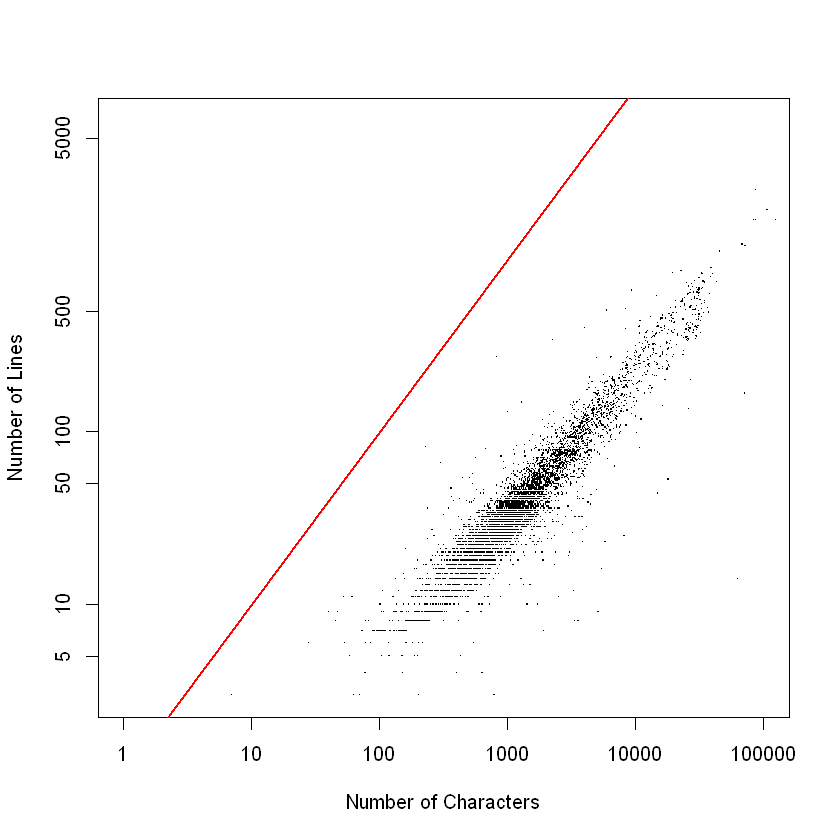

In [40]:
#pdf("ScatterPlotNumLinesNumChars.pdf", width = 6, height = 4.5)
plot(nL ~ nC, log = "xy", pch=".", xlim=c(1,100000), axes = FALSE,
     xlab = "Number of Characters", ylab = "Number of Lines")
box() 
axis(1, at = x.at, labels = formatC(x.at, digits = 0, format="d"))
axis(2, at = y.at, labels = formatC(y.at, digits = 0, format="d")) 
abline(a=0, b=1, col="red", lwd = 2)
dev.off()

#pdf("SPAM_boxplotsPercentCaps.pdf", width = 5, height = 5)

percent = emailDF$perCaps
isSpamLabs = factor(emailDF$isSpam, labels = c("ham", "spam"))
boxplot(log(1 + percent) ~ isSpamLabs,
        ylab = "Percent Capitals (log)")

#dev.off()

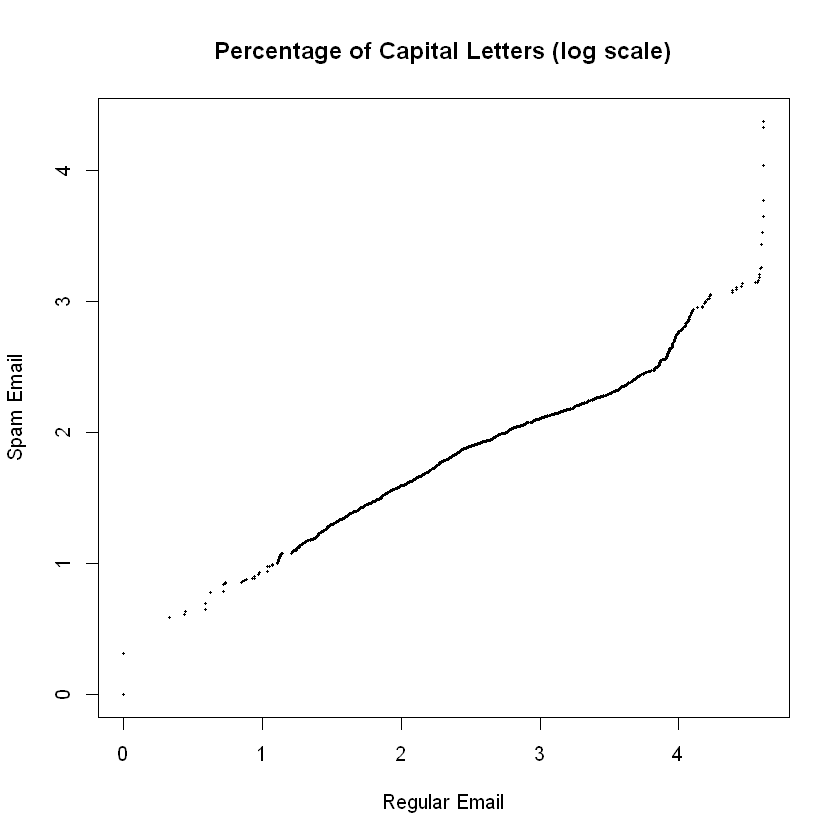

In [41]:
logPerCapsSpam = log(1 + emailDF$perCaps[ emailDF$isSpam ])
logPerCapsHam = log(1 + emailDF$perCaps[ !emailDF$isSpam ])

qqplot(logPerCapsSpam, logPerCapsHam, 
       xlab = "Regular Email", ylab = "Spam Email", 
       main = "Percentage of Capital Letters (log scale)",
       pch = 19, cex = 0.3)

    isSpamLabs
      ham spam
  0  6624 2158
  1   314  230
  2    11    6
  4     0    1
  5     1    2
  18    1    0

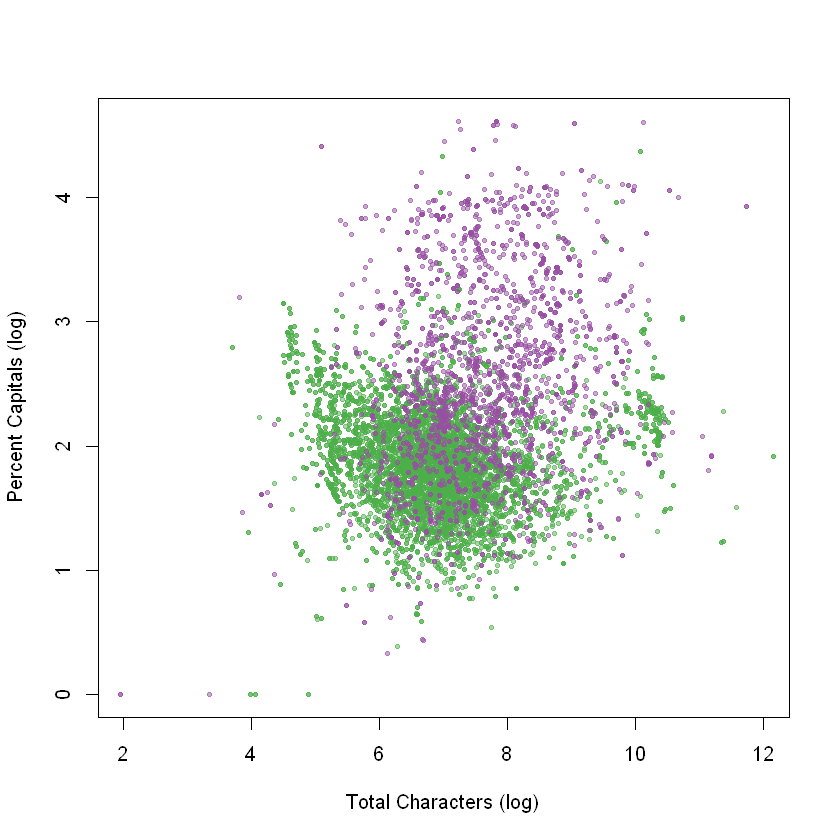

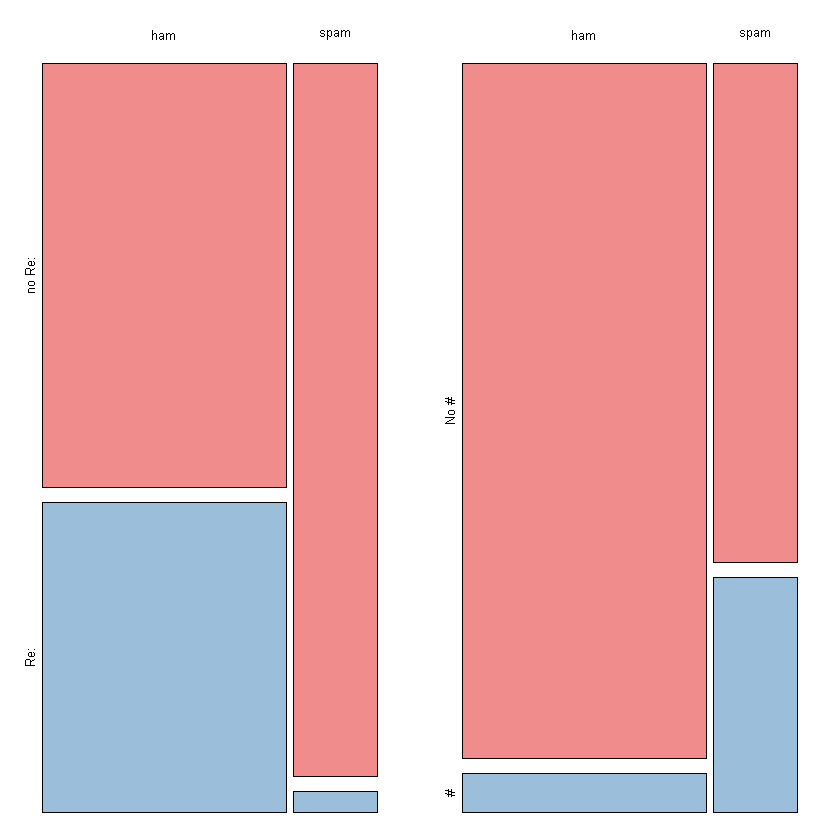

In [42]:
#pdf("SPAM_scatterplotPercentCapsTotChars.pdf", width = 8, height = 6)
 
colI = c("#4DAF4A80", "#984EA380")
logBodyCharCt = log(1 + emailDF$bodyCharCt)
logPerCaps = log(1 + emailDF$perCaps)
plot(logPerCaps ~ logBodyCharCt, xlab = "Total Characters (log)",
     ylab = "Percent Capitals (log)",
     col = colI[1 + emailDF$isSpam],
     xlim = c(2,12), pch = 19, cex = 0.5)

#dev.off()

table(emailDF$numAtt, isSpamLabs)
#pdf("SPAM_mosaicPlots.pdf", width = 8, height = 4)

oldPar = par(mfrow = c(1, 2), mar = c(1,1,1,1))

colM = c("#E41A1C80", "#377EB880")
isRe = factor(emailDF$isRe, labels = c("no Re:", "Re:"))
mosaicplot(table(isSpamLabs, isRe), main = "",
           xlab = "", ylab = "", color = colM)

fromNE = factor(emailDF$numEnd, labels = c("No #", "#"))
mosaicplot(table(isSpamLabs, fromNE), color = colM,
           main = "", xlab="", ylab = "")

par(oldPar)

#dev.off()

library(rpart)

setupRpart = function(data) {
  logicalVars = which(sapply(data, is.logical))
  facVars = lapply(data[ , logicalVars], 
                   function(x) {
                      x = as.factor(x)
                      levels(x) = c("F", "T")
                      x
                   })
  cbind(facVars, data[ , - logicalVars])
}

emailDFrp = setupRpart(emailDF)

In [43]:


set.seed(418910)
testSpamIdx = sample(numSpam, size = floor(numSpam/3))
testHamIdx = sample(numHam, size = floor(numHam/3))

testDF = 
  rbind( emailDFrp[ emailDFrp$isSpam == "T", ][testSpamIdx, ],
         emailDFrp[emailDFrp$isSpam == "F", ][testHamIdx, ] )
trainDF =
  rbind( emailDFrp[emailDFrp$isSpam == "T", ][-testSpamIdx, ], 
         emailDFrp[emailDFrp$isSpam == "F", ][-testHamIdx, ])

rpartFit = rpart(isSpam ~ ., data = trainDF, method = "class")


F    T 
2192  125

[1] 0.05394907

[1] 0.1564456

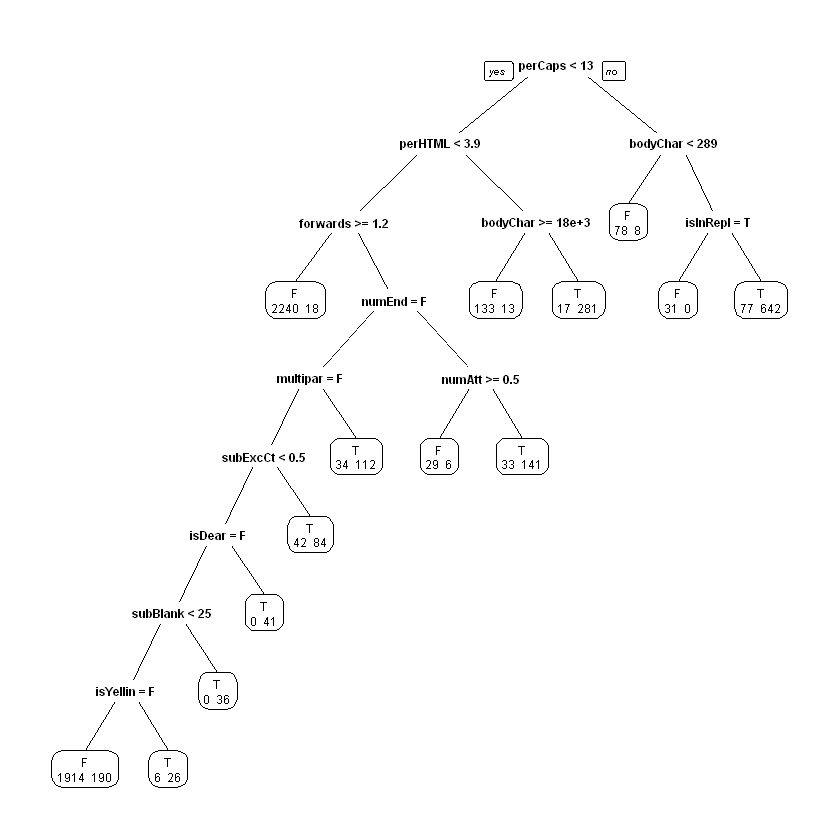

In [44]:
library(rpart.plot)
prp(rpartFit, extra = 1)

library(rpart.plot)
#pdf("SPAM_rpartTree.pdf", width = 7, height = 7)

prp(rpartFit, extra = 1)
#dev.off()

predictions = predict(rpartFit, 
       newdata = testDF[, names(testDF) != "isSpam"],
       type = "class")
 
predsForHam = predictions[ testDF$isSpam == "F" ]
summary(predsForHam)

sum(predsForHam == "T") / length(predsForHam)

predsForSpam = predictions[ testDF$isSpam == "T" ]
sum(predsForSpam == "F") / length(predsForSpam)

complexityVals = c(seq(0.00001, 0.0001, length=19),
                   seq(0.0001, 0.001, length=19), 
                   seq(0.001, 0.005, length=9),
                   seq(0.005, 0.01, length=9))

In [45]:
fits = lapply(complexityVals, function(x) {
         rpartObj = rpart(isSpam ~ ., data = trainDF,
                          method="class", 
                          control = rpart.control(cp=x) )
           
         predict(rpartObj, 
                 newdata = testDF[ , names(testDF) != "isSpam"],
                 type = "class")
        })

spam = testDF$isSpam == "T"
numSpam = sum(spam)
numHam = sum(!spam)
errs = sapply(fits, function(preds) {
                      typeI = sum(preds[ !spam ] == "T") / numHam
                      typeII = sum(preds[ spam ] == "F") / numSpam
                      c(typeI = typeI, typeII = typeII)
                     })


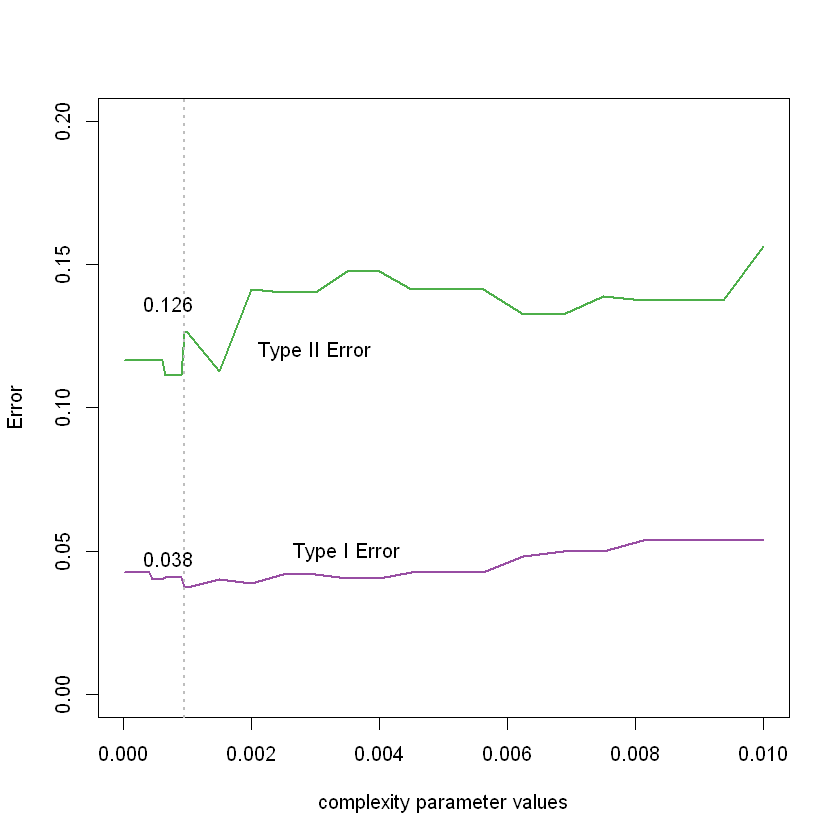

In [46]:

#pdf("SPAM_rpartTypeIandII.pdf", width = 8, height = 7)
library(RColorBrewer)
cols = brewer.pal(9, "Set1")[c(3, 4, 5)]
plot(errs[1,] ~ complexityVals, type="l", col=cols[2], 
     lwd = 2, ylim = c(0,0.2), xlim = c(0,0.01), 
     ylab="Error", xlab="complexity parameter values")
points(errs[2,] ~ complexityVals, type="l", col=cols[1], lwd = 2)

text(x =c(0.003, 0.0035), y = c(0.12, 0.05), 
     labels=c("Type II Error", "Type I Error"))

minI = which(errs[1,] == min(errs[1,]))[1]
abline(v = complexityVals[minI], col ="grey", lty =3, lwd=2)

text(0.0007, errs[1, minI]+0.01, 
     formatC(errs[1, minI], digits = 2))
text(0.0007, errs[2, minI]+0.01, 
     formatC(errs[2, minI], digits = 3))

#dev.off()

In [47]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2

Attaching package: 'ggplot2'

The following object is masked from 'package:NLP':

    annotate



In [153]:
emailDFnum

,isSpam,isRe,underscore,priority,isInReplyTo,sortedRec,subPunc,multipartText,hasImages,isPGPsigned,...,subQuesCt,numAtt,numRec,perCaps,hour,perHTML,subBlanks,forwards,avgWordLen,numDlr
./spam/messages/easy_ham1,0,1,0,0,1,1,0,0,0,0,...,0,0,2,4.451039,11,0,12.500000,0.000000,4.376623,3
./spam/messages/easy_ham2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,7.491289,11,0,8.000000,0.000000,4.555556,0
./spam/messages/easy_ham3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,7.436096,12,0,8.000000,0.000000,4.817164,0
./spam/messages/easy_ham4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,5.090909,13,0,18.918919,3.125000,4.714286,0
./spam/messages/easy_ham5,0,1,0,0,0,1,0,0,0,0,...,0,0,1,6.116643,13,0,15.217391,6.451613,4.234940,0
./spam/messages/easy_ham6,0,1,0,0,1,1,0,0,0,0,...,0,0,1,7.625272,13,0,15.217391,12.000000,3.956897,0
./spam/messages/easy_ham7,0,0,0,0,0,1,0,0,0,0,...,0,0,1,6.343714,13,0,17.021277,0.000000,4.051402,0
./spam/messages/easy_ham8,0,1,0,0,0,1,0,0,0,0,...,0,0,1,6.617647,14,0,15.217391,12.820513,4.039604,0
./spam/messages/easy_ham9,0,0,0,0,0,1,0,0,0,0,...,0,0,1,3.161361,14,0,6.250000,0.000000,4.405222,0
./spam/messages/easy_ham10,0,1,0,0,1,1,0,0,0,0,...,0,0,2,4.451039,11,0,12.500000,0.000000,4.376623,3


In [152]:
setupRnum = function(data) {
  logicalVars = which(sapply(data, is.logical))
  facVars = lapply(data[ , logicalVars], 
                   function(x) {
                      x = as.numeric(x)
                   })
  cbind(facVars, data[ , - logicalVars])
}

emailDFnum = setupRnum(emailDF)

In [48]:
flds <- createFolds(emailDFrp$isSpam, k = 10, list = F, returnTrain = FALSE)

In [49]:
flds

[1]  3  9  1  6 10  5  1  6  3  2  5  4  6 10  1 10  9  8  7  5  9  2  7  9
  [25] 10  1  8  3  3 10  4  7 10  9  3 10  6  5  8 10  4  2  3  1  2  7  3  5
  [49]  7  5  8  7  2  3  8  4 10  2  3  3  5  8  8 10  7  6  8  4  1  6  8  9
  [73]  8  2  5  7  3  1  7  7  7  6  6  7 10 10  3  4  1  7  2  2  6  2  4  5
  [97]  2  7  7  7  1  8  2  7  8  4  4  7  4  1  6 10  1  7  4 10  1  4  4  9
 [121]  8  1  3  6  9  4  7  5 10  3  5  1  1  1  6  8  8  9  1  5  8  5  8  2
 [145]  3  7  8  7  7  9 10  6  3  9  6  3  2  4  8  6  5 10  9  1 10  9  6  1
 [169] 10  8  1  1  1  9  9  7  4  8  7  1  1  9  9  9  3  9  2  9  9  2  1  6
 [193]  6  9  8  8  2  7  4  7  7  8  9  4  5  9  5  1  6  1  9  6  2  5  5 10
 [217]  6  9  7  3  8  4  3  1  1 10  7  4  9  5  8  4  4  5  7  4  8  3  1  7
 [241] 10  5  8  8  5  1  2  7  7 10  2  1  2 10  4  1  4  7  2  3 10  8  4  4
 [265]  5  2  4  3  3  4  8  5  8  7  2  2 10  6  2  3  8  3  1  6  7 10  7  2
 [289]  8  3  6  8  1  1  5  4  3  8  8  7  9 10  7  9  6  9 10  3  6  9  4  7
 [313]  6  2 10  9  6  6  8  1  3  2  4  3  5  5  8  2  6  1  1  2  3  2  3  7
 [337]  3  1  6  5  1  1  8  4 10  1  6  4  2 10  2  6  4 10  8  6  8  3  3  3
 [361]  3  2  8  4  7  2 10 10 10  8  5  1  3  5  9  1  7  3  5  1  4  3  9  6
 [385]  5  3  7  6  9  4  8  6 10  6  5  4  2  4  6  1  6  7  5  4  2  1  8 10
 [409]  6  1  6  7  9  4  7  1  3  5 10  5  4  5  2  7  9  7 10  2  7  3  7  5
 [433]  4  3  7  5  8  7  3  5  9  5  9  4  5  1  8  8  6  1 10  3  6  2  8  4
 [457]  4  2  3  6 10  9  8 10  7  8  1  6  6  8  7  4  1  2  8  8  6  9  6  9
 [481]  7  7  1 10  4  6  1 10  3  8 10 10  2  8  2  3  3  3  4  4  9  8  3  9
 [505]  6  6  8  5  6  9  8  2  5  6  2  6  1  9  2  5  7  9  6  5 10  7  4  9
 [529]  3  8  8  6  4  8  5  2 10  9  7  1  8  8  2  9  9  8  8  2  7 10  8  7
 [553]  7  1  1  8  1  6 10  2  1  4  8  5  1 10  4  7  6  7  7  9  7  3  7  8
 [577]  7  9  8  6  5  6  5  8  9  8  5  1  2  2 10  5  7  3  4 10  5  2  4  6
 [601]  4  6  9  9  5  7  2  3  8  7  7  1  2  8  1  5  5  1  3  8  3  2  4  2
 [625]  3  3  9  7  5 10  1  2 10  1  6  1 10  7  4  8  9  6  5  2  4  4  9 10
 [649]  9  3  4 10  9  8  2  7  6  4  1  3  2  8  1  9  3  4 10  2  7  4  9  7
 [673]  2  6  7  5  2  7  5 10  9  9  4  4  5  4  3 10  6  4  3  7  1  3  1  9
 [697]  8  7  6  1  9  7  8  6  9  2  7  4  5  7  3  4  3  2  1  2  7  2  2  5
 [721]  1  7  5  3  8  9  3 10 10  4  2 10  6  5  2  9  5  9  5  2 10  8  1 10
 [745] 10  9  7  9  2  6  7  5  2 10 10  4  3  5  8  2  7  3  7  7  1  5  3  9
 [769]  8 10  3  6  9  9 10  8  5  7  8  7  9  1  8  9  9  4  4  3  2  7  1  4
 [793]  8 10  6  7  9  7  1  3  3  1  5 10 10  9  5  5  1  1  4  4  6  7  9  5
 [817] 10  2  8  9  8  4  7 10  4  7  7 10 10  6  8  8  6  5 10  1  1  7  8  9
 [841]  2 10  9  6  4  9  2  7  8  3  3  2  8  8  9  8  8  5  6  4  5  8  5  1
 [865]  9  2  8  8  2  2  1  2  4  1  9  4 10  2  9  2  1  6  5  2  5  9  4  1
 [889]  1  5  1  7  4  3  2  3  4  8  7  9  4  7  5  3  3 10  8  7  4  9  1  2
 [913]  8  1  1  8  1  8  8  3  5  1  6  8  2  4  3  4  8  8  2  2  9 10  1 10
 [937] 10  5  2  3  8  9  7  4  9  3  6  2 10  1  2  2  5  8  8  4  9  8  1  9
 [961]  9  4  9  1  9  2  4  1  4  2 10  8  8  9  7  4  9  9  1  8  6  7  6  8
 [985]  1  7  3  7  5  4  9  8  6 10  7  3  4  2  7  4  6  6  6  7  2  8  8  5
[1009]  3  2  7  1  4  2  7  2  4  9  8  5  5  2  2  7  1  2  9  8  3  7  9  4
[1033]  1  3  4  3  5  8  3  7  3  2  1  2  5  6  5  9  3  1  3  9  7  5  4  6
[1057]  5 10  4  3  2  3  9  5  1  8  1  8  5  6  4  8  4  8  2  6  2 10  3  5
[1081]  3  8  8  2  1  5  8  3  2  5  2 10  7  4  1  2  2  3  6  3 10  7  6  4
[1105]  8  8 10  7  2  9  2  1  3  9  3  7  6  2  6  7  6  8  1  6  6  7  2  9
[1129]  7  1  2  5 10  9  7  9  7  4  5  7  9  3  3  1  9  1  4  6  5  4 10  6
[1153] 10  6 10  6  4  5  8  9  3  2  2  3  6  5  2  2  1  7  7  6  6  3  6  1
[1177] 10  2  8  6  7  2  3  8  8  6  5  3  5 10  4  4  3  6  2  4 10  2  2  8
[1201]  4  5  1  9  8  2  7 10  4  9 10  8  8  9  2  

,isSpam,isRe,numLines,bodyCharCt,underscore,subExcCt,subQuesCt,numAtt,priority,numRec,...,subBlanks,noHost,numEnd,isYelling,forwards,isOrigMsg,isDear,isWrote,avgWordLen,numDlr
./spam/messages/easy_ham1,FALSE,TRUE,50,1554,FALSE,0,0,0,FALSE,2,...,12.500000,FALSE,FALSE,FALSE,0.000000,FALSE,FALSE,FALSE,4.376623,3
./spam/messages/easy_ham2,FALSE,FALSE,26,873,FALSE,0,0,0,FALSE,1,...,8.000000,FALSE,FALSE,FALSE,0.000000,FALSE,FALSE,FALSE,4.555556,0
./spam/messages/easy_ham3,FALSE,FALSE,38,1713,FALSE,0,0,0,FALSE,1,...,8.000000,FALSE,FALSE,FALSE,0.000000,FALSE,FALSE,FALSE,4.817164,0
./spam/messages/easy_ham4,FALSE,FALSE,32,1095,FALSE,0,0,0,FALSE,0,...,18.918919,FALSE,FALSE,FALSE,3.125000,FALSE,FALSE,FALSE,4.714286,0
./spam/messages/easy_ham5,FALSE,TRUE,31,1021,FALSE,0,0,0,FALSE,1,...,15.217391,FALSE,FALSE,FALSE,6.451613,FALSE,FALSE,FALSE,4.234940,0
./spam/messages/easy_ham6,FALSE,TRUE,25,718,FALSE,0,0,0,FALSE,1,...,15.217391,FALSE,FALSE,FALSE,12.000000,FALSE,FALSE,FALSE,3.956897,0
./spam/messages/easy_ham7,FALSE,FALSE,38,1288,FALSE,0,0,0,FALSE,1,...,17.021277,FALSE,FALSE,FALSE,0.000000,FALSE,FALSE,FALSE,4.051402,0
./spam/messages/easy_ham8,FALSE,TRUE,39,1182,FALSE,0,0,0,FALSE,1,...,15.217391,FALSE,FALSE,FALSE,12.820513,FALSE,FALSE,TRUE,4.039604,0
./spam/messages/easy_ham9,FALSE,FALSE,126,5989,FALSE,0,0,0,FALSE,1,...,6.250000,FALSE,FALSE,FALSE,0.000000,FALSE,FALSE,FALSE,4.405222,0
./spam/messages/easy_ham10,FALSE,TRUE,50,1554,FALSE,0,0,0,FALSE,2,...,12.500000,FALSE,FALSE,FALSE,0.000000,FALSE,FALSE,FALSE,4.376623,3


In [154]:
sum(is.na(emailDFnum))

[1] 357

In [155]:
sapply(emailDFnum, function(y) sum(length(which(is.na(y)))))

isSpam          isRe    underscore      priority   isInReplyTo 
            0             0             0             0             0 
    sortedRec       subPunc multipartText     hasImages   isPGPsigned 
            0             0             0             0             0 
 subSpamWords        noHost        numEnd     isYelling     isOrigMsg 
            7             1             0             7             0 
       isDear       isWrote      numLines    bodyCharCt      subExcCt 
            0             0             0             0            20 
    subQuesCt        numAtt        numRec       perCaps          hour 
           20             0           282             0             0 
      perHTML     subBlanks      forwards    avgWordLen        numDlr 
            0            20             0             0             0

In [156]:
emailDFnum[is.na(emailDFrp)] <- 0

In [157]:
 sum(is.na(emailDFnum))

[1] 0

In [158]:
library(glmnet)

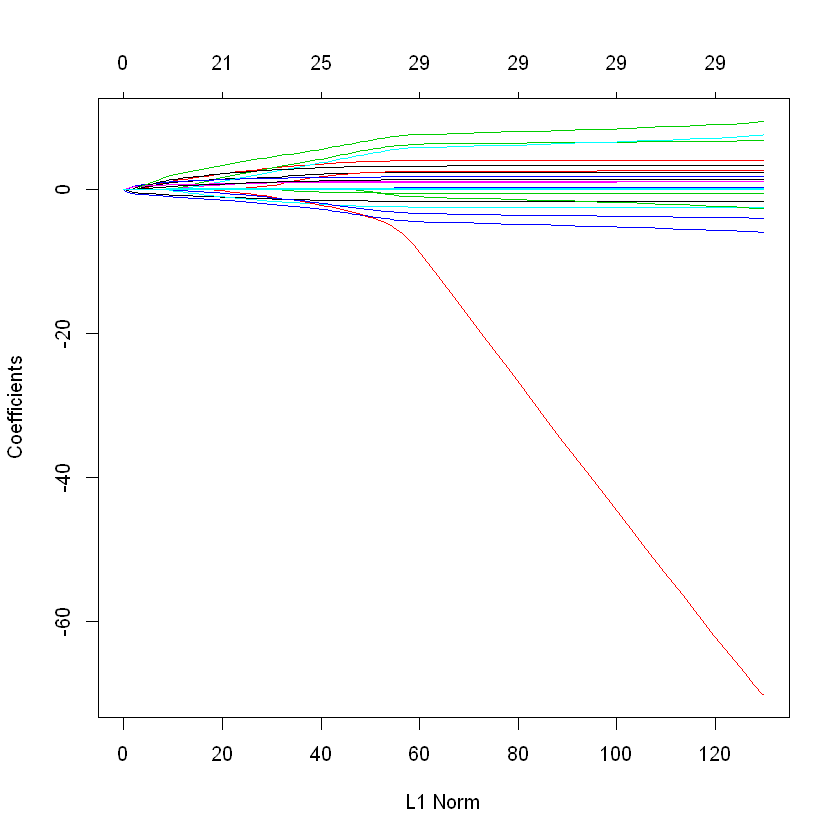

In [136]:
fit<-glmnet(as.matrix(emailDFnum[,2:30]),as.matrix(emailDFnum[,1]),family='binomial', alpha=1)
plot(fit)


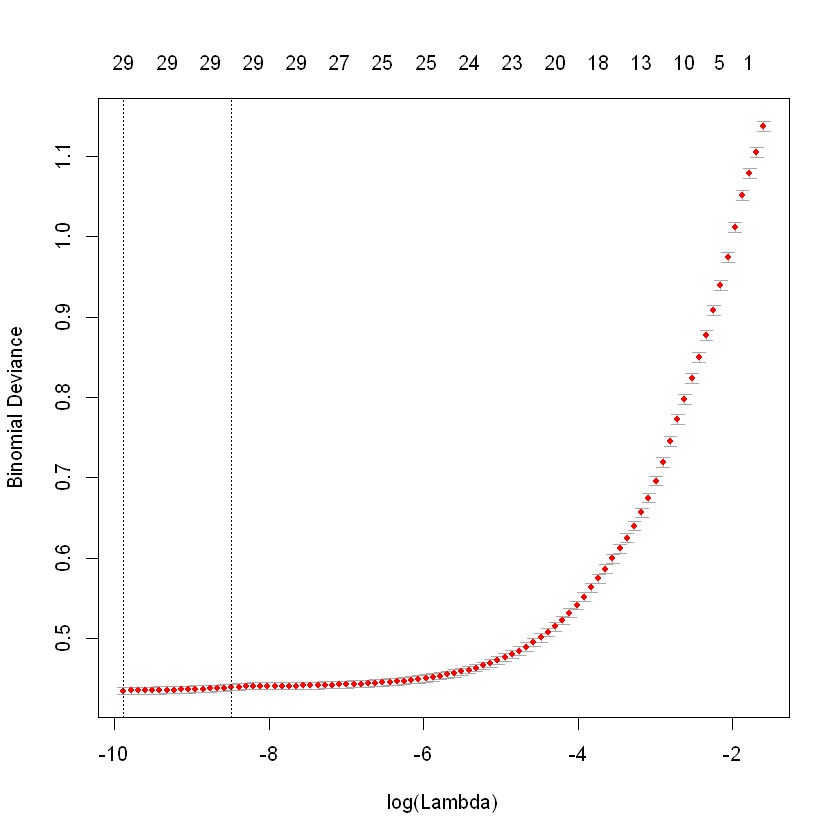

In [135]:
fit<-cv.glmnet(as.matrix(emailDFnum[,2:30]),as.matrix(emailDFnum[,1]),family='binomial')
plot(fit)


In [137]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



In [160]:
fitrf<-randomForest(as.factor(emailDFnum[,1])~.,data=emailDFnum,ntree=500)


In [161]:
fitrf


Call:
 randomForest(formula = as.factor(emailDFnum[, 1]) ~ ., data = emailDFnum,      ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 0%
Confusion matrix:
     0    1 class.error
0 6951    0           0
1    0 2397           0

In [144]:
coef(fitrf)

NULL

In [348]:
for (i in 1:29){
print(sum(is.na(x[,i])))}

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 7
[1] 1
[1] 0
[1] 7
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 20
[1] 20
[1] 0
[1] 282
[1] 0
[1] 0
[1] 0
[1] 20
[1] 0
[1] 0
[1] 0


In [351]:
x[is.na(x)]<-0

,isSpam,isRe,numLines,bodyCharCt,underscore,subExcCt,subQuesCt,numAtt,priority,numRec,...,subBlanks,noHost,numEnd,isYelling,forwards,isOrigMsg,isDear,isWrote,avgWordLen,numDlr
./spam/messages/easy_ham1,FALSE,TRUE,50,1554,FALSE,0,0,0,FALSE,2,...,12.500000,FALSE,FALSE,FALSE,0.000000,FALSE,FALSE,FALSE,4.376623,3
./spam/messages/easy_ham2,FALSE,FALSE,26,873,FALSE,0,0,0,FALSE,1,...,8.000000,FALSE,FALSE,FALSE,0.000000,FALSE,FALSE,FALSE,4.555556,0
./spam/messages/easy_ham3,FALSE,FALSE,38,1713,FALSE,0,0,0,FALSE,1,...,8.000000,FALSE,FALSE,FALSE,0.000000,FALSE,FALSE,FALSE,4.817164,0
./spam/messages/easy_ham4,FALSE,FALSE,32,1095,FALSE,0,0,0,FALSE,0,...,18.918919,FALSE,FALSE,FALSE,3.125000,FALSE,FALSE,FALSE,4.714286,0
./spam/messages/easy_ham5,FALSE,TRUE,31,1021,FALSE,0,0,0,FALSE,1,...,15.217391,FALSE,FALSE,FALSE,6.451613,FALSE,FALSE,FALSE,4.234940,0
./spam/messages/easy_ham6,FALSE,TRUE,25,718,FALSE,0,0,0,FALSE,1,...,15.217391,FALSE,FALSE,FALSE,12.000000,FALSE,FALSE,FALSE,3.956897,0
./spam/messages/easy_ham7,FALSE,FALSE,38,1288,FALSE,0,0,0,FALSE,1,...,17.021277,FALSE,FALSE,FALSE,0.000000,FALSE,FALSE,FALSE,4.051402,0
./spam/messages/easy_ham8,FALSE,TRUE,39,1182,FALSE,0,0,0,FALSE,1,...,15.217391,FALSE,FALSE,FALSE,12.820513,FALSE,FALSE,TRUE,4.039604,0
./spam/messages/easy_ham9,FALSE,FALSE,126,5989,FALSE,0,0,0,FALSE,1,...,6.250000,FALSE,FALSE,FALSE,0.000000,FALSE,FALSE,FALSE,4.405222,0
./spam/messages/easy_ham10,FALSE,TRUE,50,1554,FALSE,0,0,0,FALSE,2,...,12.500000,FALSE,FALSE,FALSE,0.000000,FALSE,FALSE,FALSE,4.376623,3
